In [24]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.fft import fft
import scipy.signal as signal
from math import log10

**SE OBTIENE EL DATASET**




In [25]:
array_basal = np.genfromtxt("ecg_basal-andres.txt", delimiter="\t")
array_Respiracion = np.genfromtxt("ecg-aguantando-respiracion-andres.txt", delimiter="\t")
array_ejercicio = np.genfromtxt("egc_ejercicio_andres.txt", delimiter="\t")
d_sensor_basal= array_basal[:,-2]
d_sensor_respi = array_Respiracion[:,-2]
d_sensor_ejer = array_ejercicio[:,-2]
d_sensor_basal = d_sensor_basal[1000:,]
d_sensor_respi = d_sensor_respi[1000:,]
d_sensor_respi=d_sensor_respi[2000:32000]

**SE ANALIZA LAS SEÑALES EN FRECUENCIA**

Conociendo los datos de adquisición de la señal, analicemos ahora el espectro de Fourier.

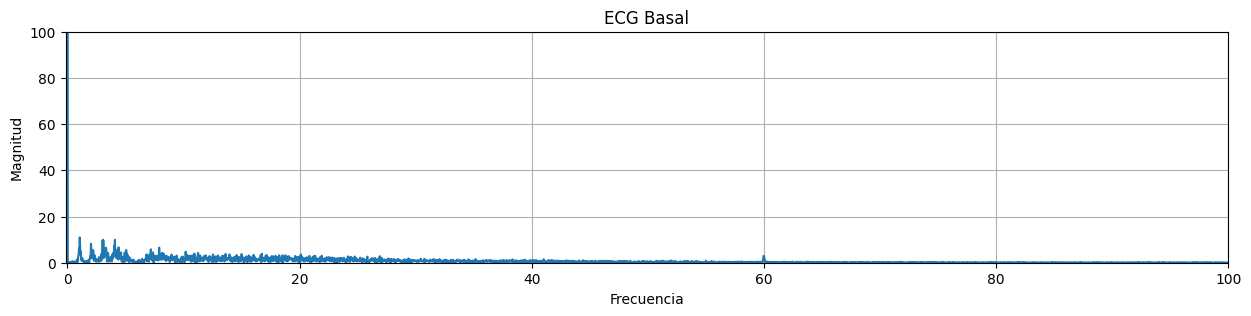

In [26]:
# Analizar el Fourier
ecg_senal = d_sensor_basal
T = 0.001
N = len(ecg_senal)
yf = fft(ecg_senal)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(15,3))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.title("ECG Basal")
plt.xlim(-0.15,100)
plt.ylim(0,100)
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.show()

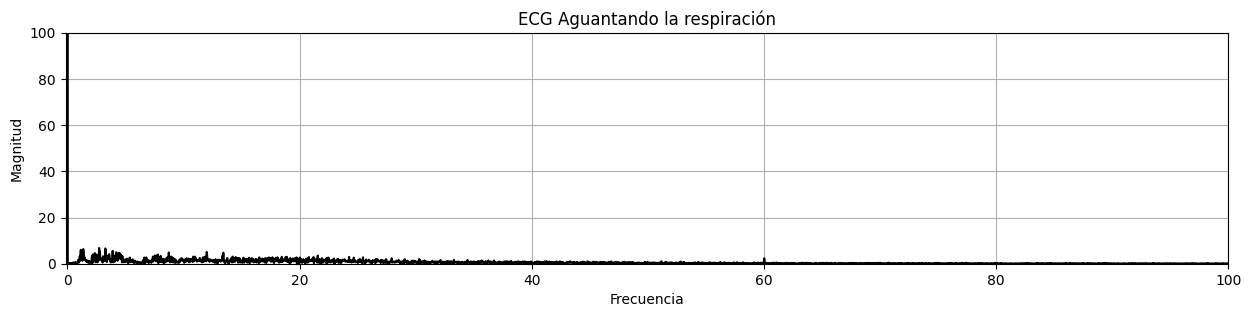

In [27]:
ecg_senal2 = d_sensor_respi
# Periodo de 2ms (0.002s) o frecuencia de 500 Hz
T = 0.001
N2 = len(ecg_senal2)
yf2 = fft(ecg_senal2)
xf2 = np.linspace(0.0, 1.0/(2.0*T), N2//2)
plt.figure(figsize=(15,3))
plt.plot(xf2, 2.0/N2 * np.abs(yf2[0:N2//2]),'k')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.title("ECG Aguantando la respiración")
plt.xlim(-0.15,100)
plt.ylim(0,100)
plt.show()

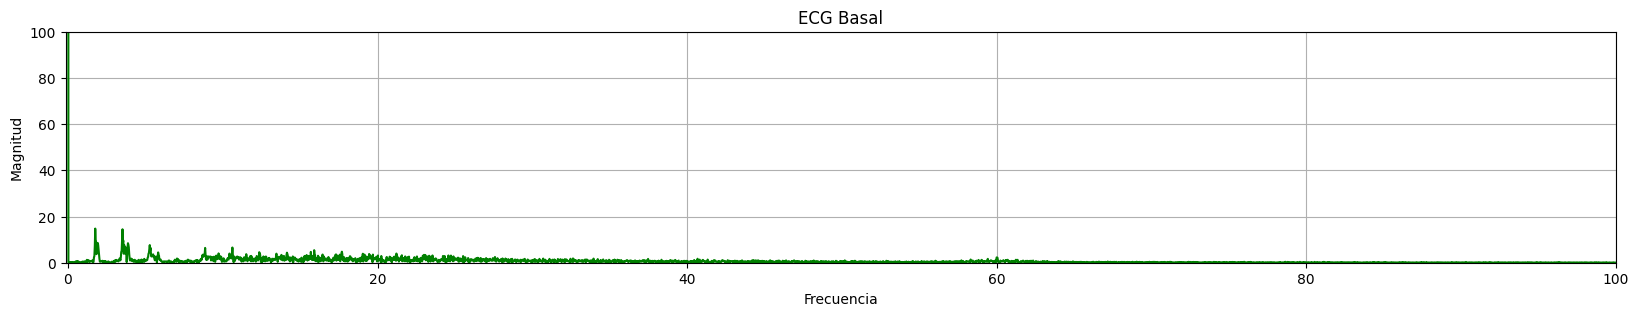

In [28]:
ecg_senal3 = d_sensor_ejer
# Periodo de 2ms (0.002s) o frecuencia de 500 Hz
T = 0.001
N3 = len(ecg_senal3)
yf3 = fft(ecg_senal3)
xf3 = np.linspace(0.0, 1.0/(2.0*T), N3//2)
plt.figure(figsize=(20,3))
plt.plot(xf3, 2.0/N3 * np.abs(yf3[0:N3//2]),'g')
plt.grid()
plt.xlim([40,100])
plt.ylim([0,200])
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.title("ECG Basal")
plt.xlim(-0.15,100)
plt.ylim(0,100)
plt.show()

En el gráfico anterior, existe un ruido en 60 Hz en las 3 señales.

Se propone utilizar filtros digitales Notch



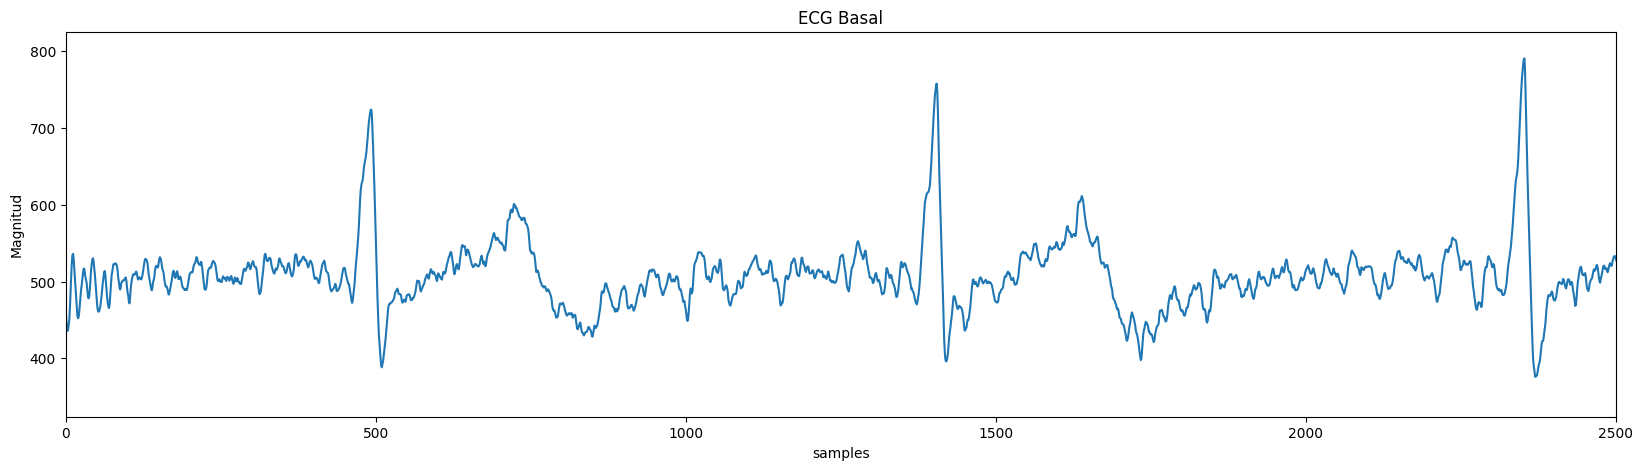

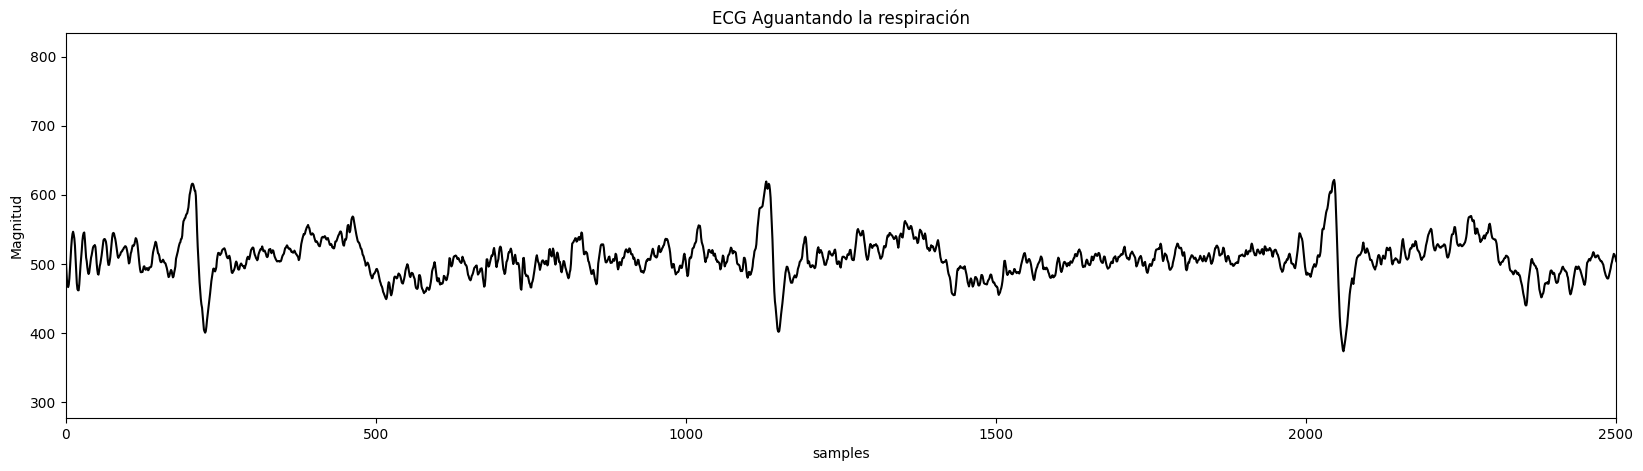

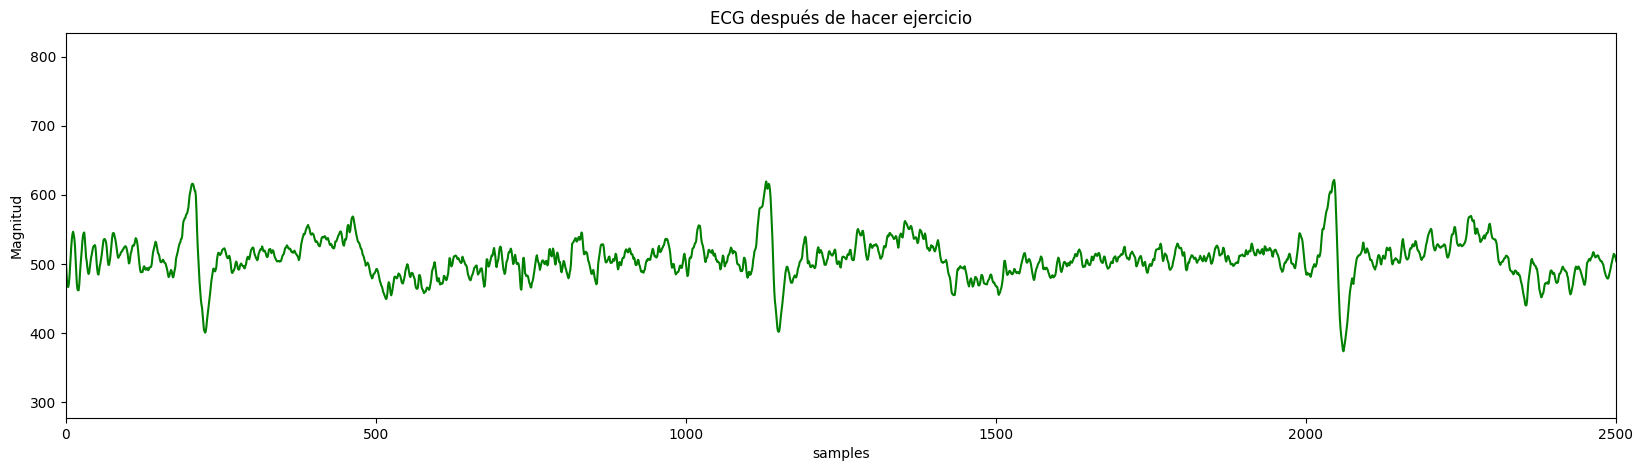

In [29]:
# Utilizar filtros Notch para quitar frecuencias que hagan ruido
from scipy.signal import iirnotch, lfilter
fs = 1/T  # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, fs)
y = lfilter(b, a, ecg_senal)
y = lfilter(b, a, y)

plt.figure(figsize=(20,5))
plt.title("ECG Basal")
plt.xlim(0,2500)
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.plot(y)
plt.show()
y2 = lfilter(b, a, ecg_senal2)
y2 = lfilter(b, a, y2)

plt.figure(figsize=(20,5))
plt.title("ECG Aguantando la respiración")
plt.xlim(0,2500)
plt.plot(y2,'k')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.show()
y3 = lfilter(b, a, ecg_senal3)
y3 = lfilter(b, a, y3)

plt.figure(figsize=(20,5))
plt.title("ECG después de hacer ejercicio")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.xlim(0,2500)
plt.plot(y2,'g')
plt.show()

Regresamos a verificar las atenuaciones de los filtros en frecuencia

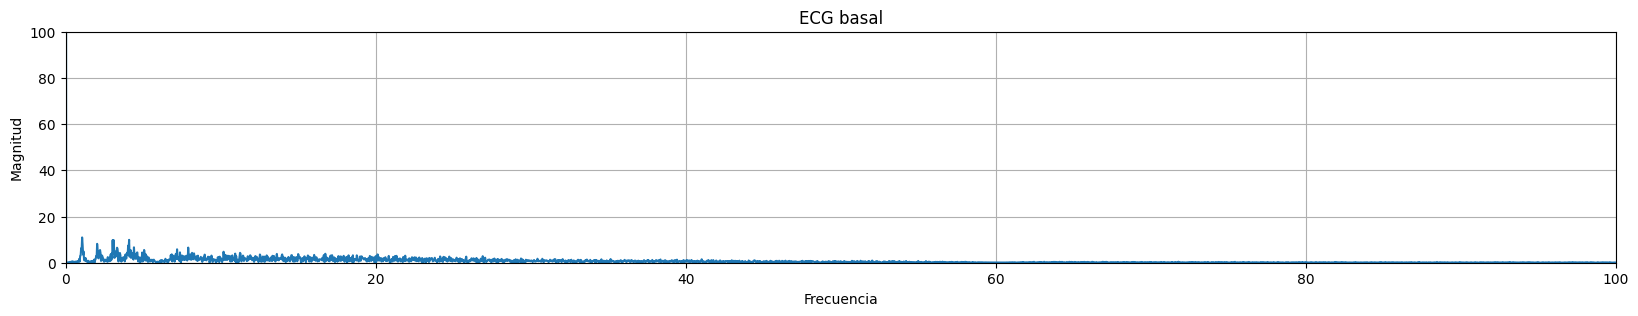

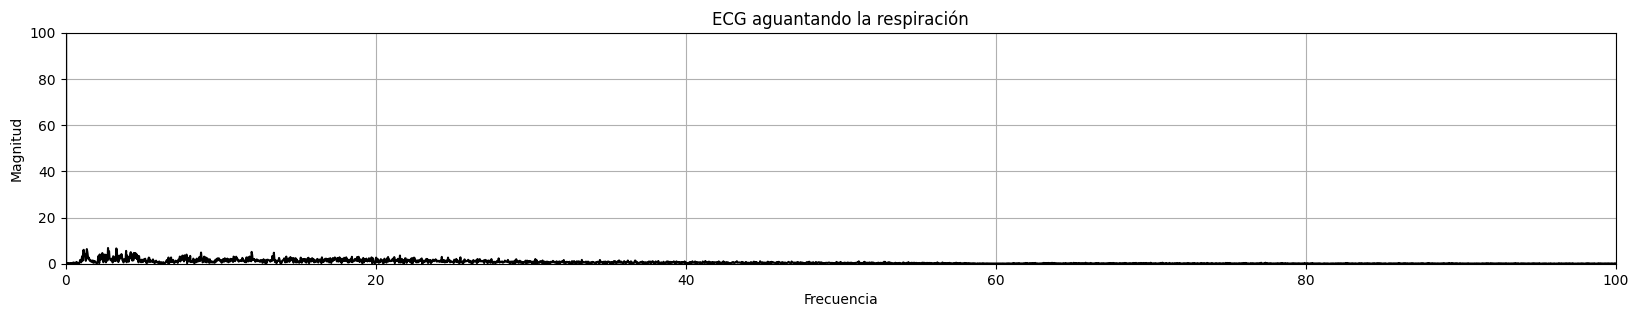

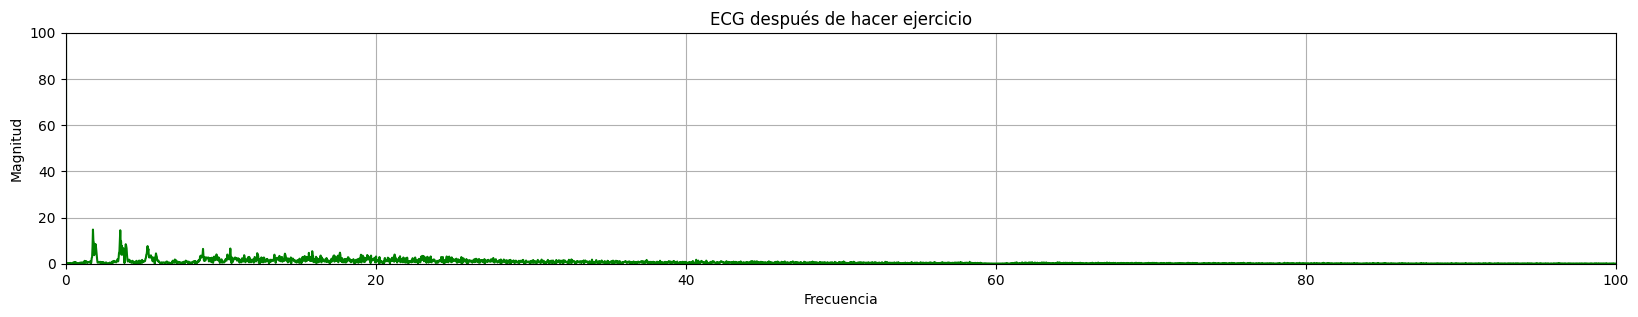

In [30]:
T = 0.001
N = len(y)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure(figsize=(20,3))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
ecg_signal = y

N2 = len(y2)
yf2 = fft(y2)
xf2 = np.linspace(0.0, 1.0/(2.0*T), N2//2)
plt.figure(figsize=(20,3))
plt.plot(xf2, 2.0/N2 * np.abs(yf2[0:N2//2]),'k')
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.title("ECG aguantando la respiración")
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
ecg_signal2 = y2

N3 = len(y3)
yf3 = fft(y3)
xf3 = np.linspace(0.0, 1.0/(2.0*T), N3//2)
plt.figure(figsize=(20,3))
plt.plot(xf3, 2.0/N3 * np.abs(yf3[0:N3//2]),'g')
plt.grid()
plt.xlim([40,100])
plt.ylim([0,200])
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.title("ECG después de hacer ejercicio")
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
ecg_signal3 = y3

**FILTRADO DE PASA BANDA**

In [31]:
from scipy.signal import freqz, iirdesign, iirfilter, find_peaks
# 2. filtro pasa banda
# Sub filtro pasa bajo
b, a = iirfilter(2, 11.0, btype='lowpass', rs=3, ftype='butter', fs=1000)
w, h = freqz(b, a, fs=1000)

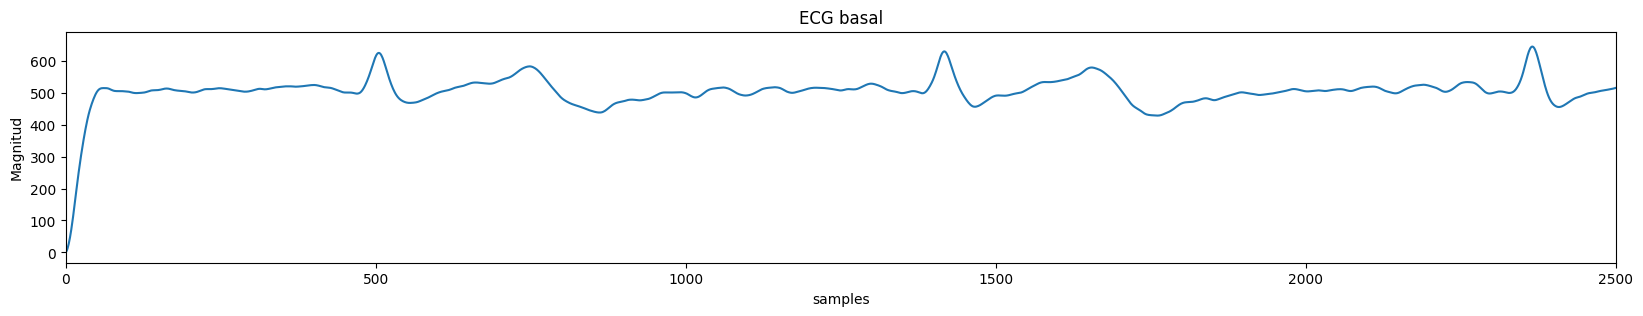

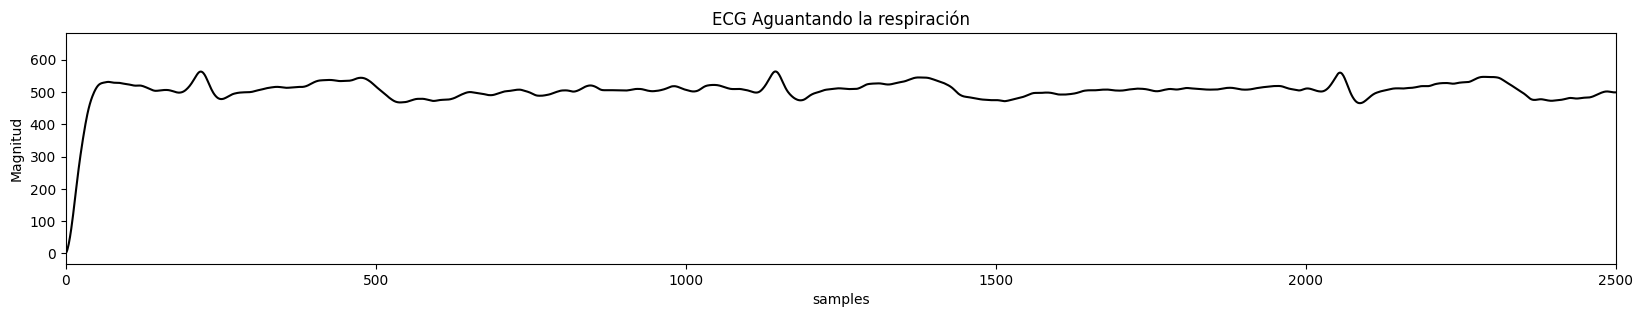

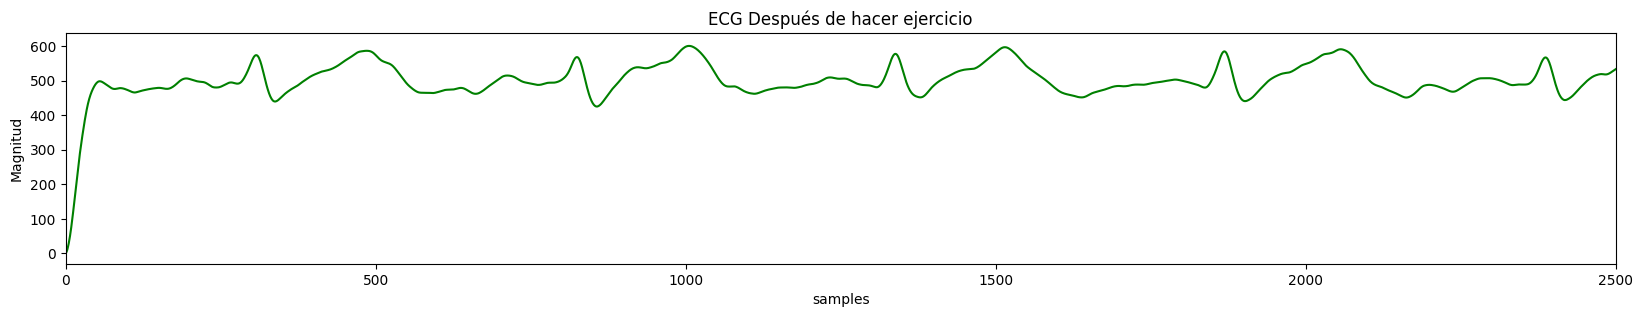

In [32]:
fpb_signal = lfilter(b, a, ecg_signal)
plt.figure(figsize=(20,3))
plt.plot(fpb_signal)
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.xlim(0,2500)
plt.show()

fpb_signal2 = lfilter(b, a, ecg_signal2)
plt.figure(figsize=(20,3))
plt.plot(fpb_signal2,'k')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.xlim(0,2500)
plt.title("ECG Aguantando la respiración")
plt.show()

fpb_signal3 = lfilter(b, a, ecg_signal3)
plt.figure(figsize=(20,3))
plt.plot(fpb_signal3,'g')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.xlim(0,2500)
plt.title("ECG Después de hacer ejercicio")
plt.show()

**FILTRO PASA ALTO**

In [33]:
b, a = iirfilter(1, 5.0, btype='highpass', rs=3, ftype='butter', fs=1000)
w, h = freqz(b, a, fs=1000)

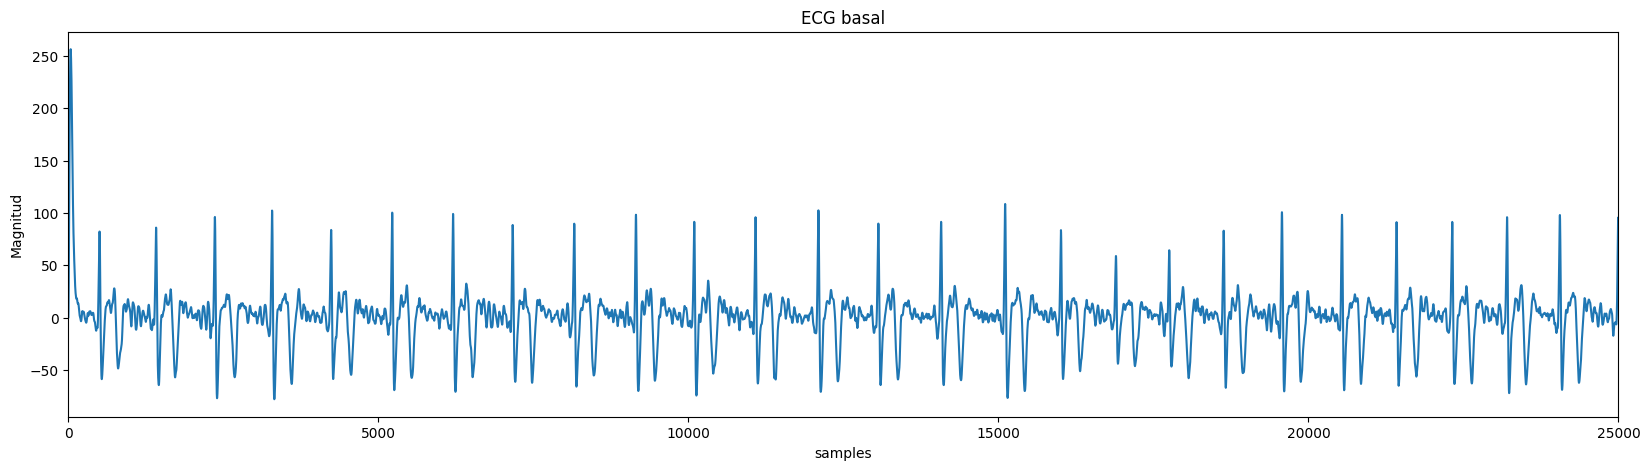

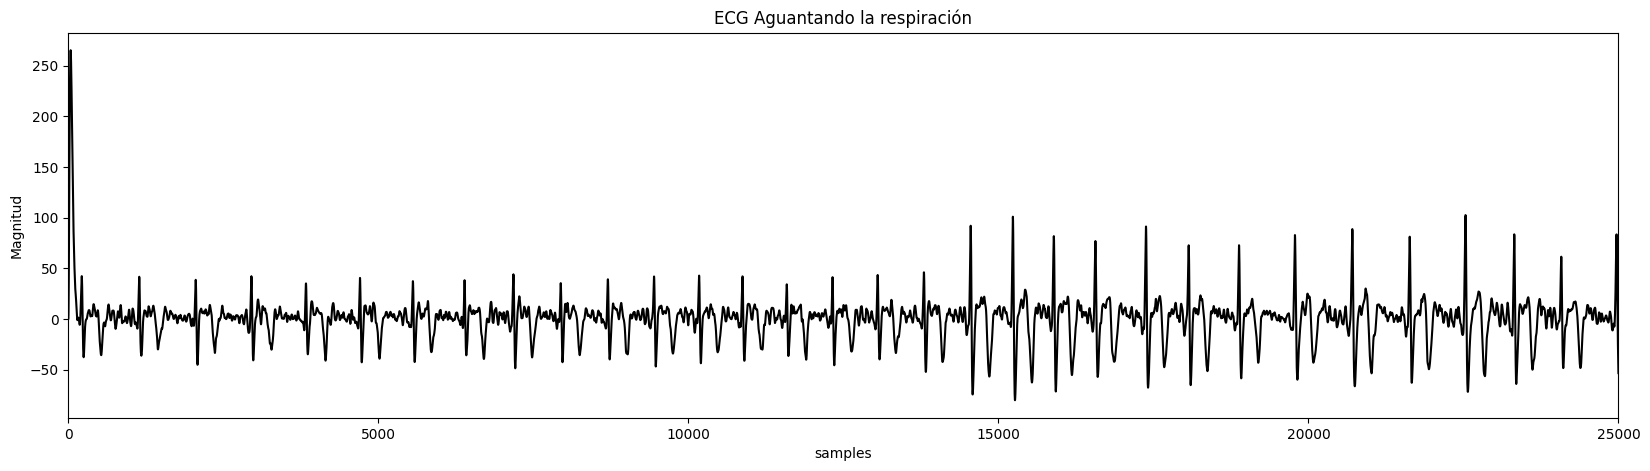

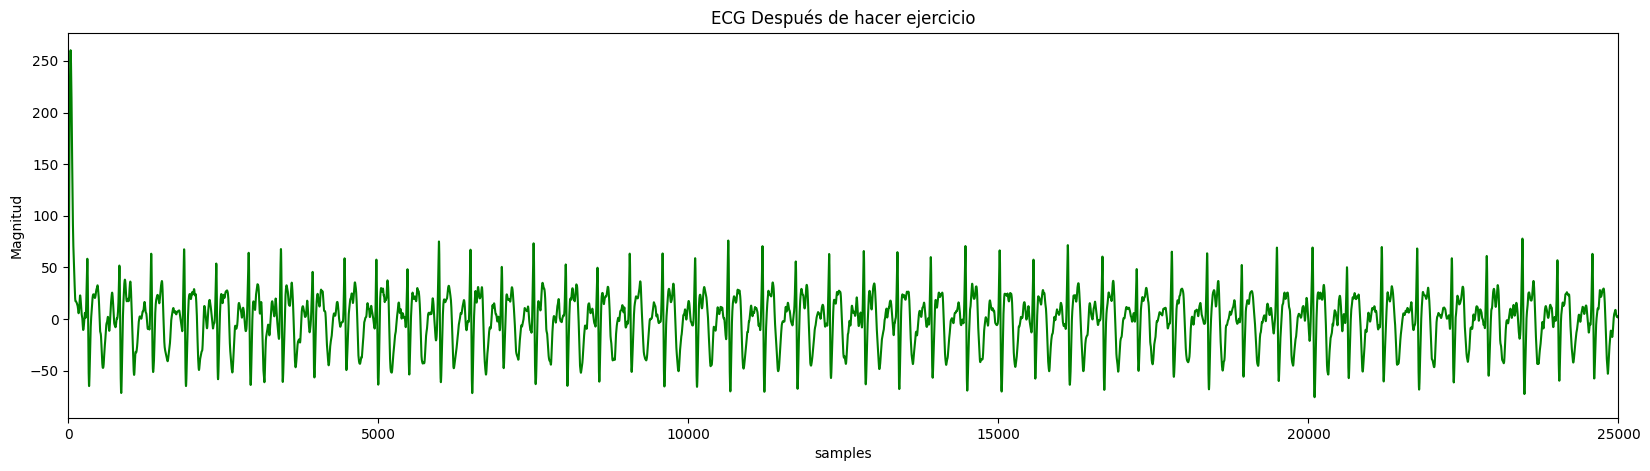

In [34]:
fpa_signal = lfilter(b, a, fpb_signal)
plt.figure(figsize=(20,5))
plt.plot(fpa_signal)
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.xlim(0,25000)
plt.show()

fpa_signal2 = lfilter(b, a, fpb_signal2)
plt.figure(figsize=(20,5))
plt.plot(fpa_signal2,'k')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.xlim(0,25000)
plt.title("ECG Aguantando la respiración")
plt.show()

fpa_signal3 = lfilter(b, a, fpb_signal3)
plt.figure(figsize=(20,5))
plt.plot(fpa_signal3,'g')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.xlim(0,25000)
plt.title("ECG Después de hacer ejercicio")
plt.show()

**OPERADOR DERIVATIVO**

En el artículo nos dan la siguiente función que describe al operador:

y[n]=(1/8)(−x[n−2]−2x[n−1]+2x[n+1]+x[n+2])

Para que esta ecuación pueda ser utilizada necesitamos encuadrarla en un rango de  [0,+∞]  haciendo que  n=+2  entonces tenemos:

y[n]=(1/8)(−x[n]−2x[n+1]+2x[n+3]+x[n+4]) 

Por lo tanto:

b=[−1,−2,0,2,1]

In [35]:
# Filtro derivativo
b = np.array([-1, -2, 0, 2, 1])
b = (1/8)*b
w, h = freqz(b, 1, fs=1000)

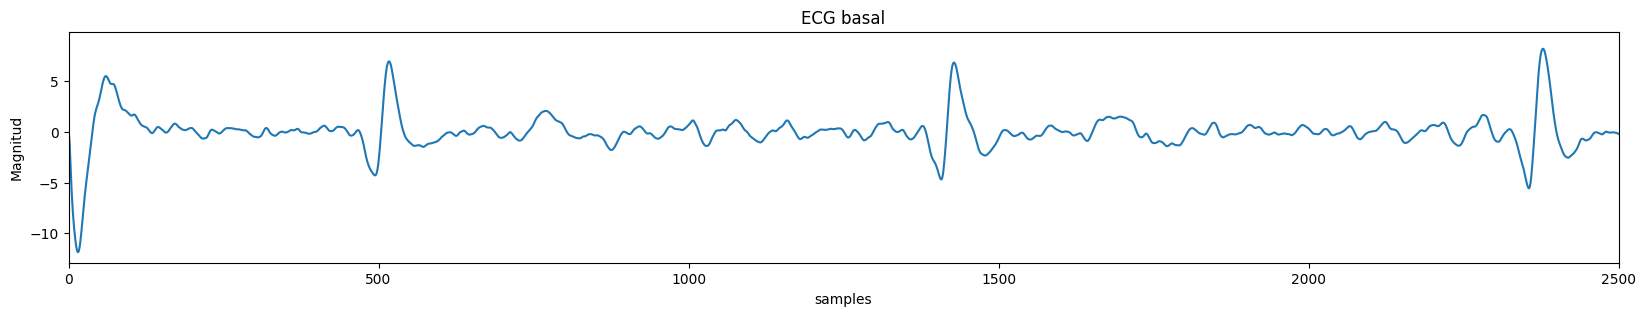

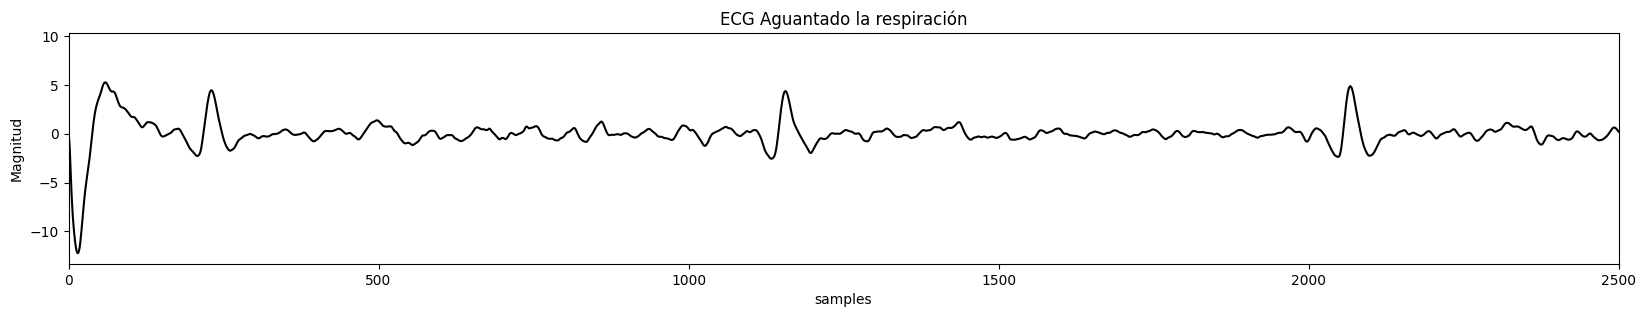

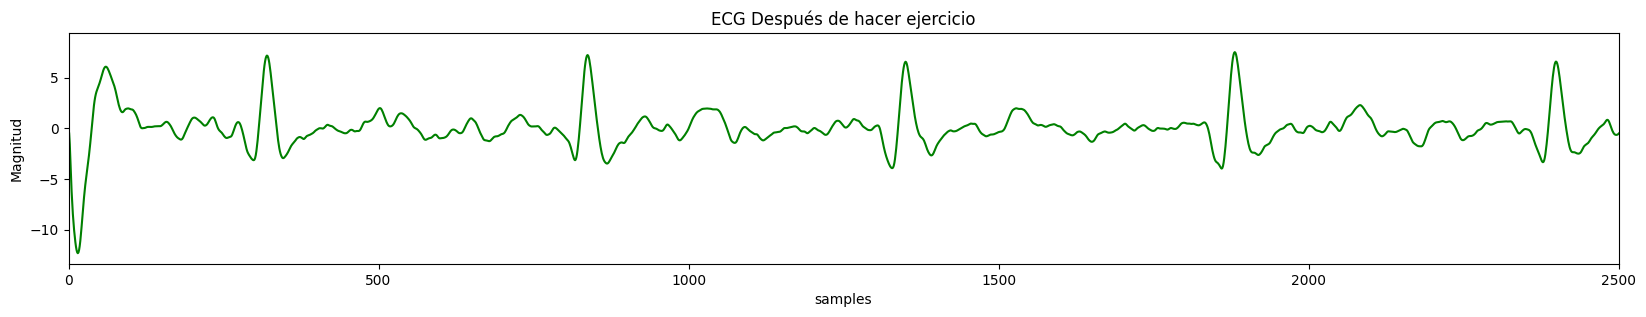

In [36]:
fd_signal = lfilter(b, 1, fpa_signal)
plt.figure(figsize=(20,3))
plt.plot(fd_signal)
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.xlim(0,2500)
plt.title("ECG basal")
plt.show()

fd_signal2 = lfilter(b, 1, fpa_signal2)
plt.figure(figsize=(20,3))
plt.plot(fd_signal2,'k')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.xlim(0,2500)
plt.title("ECG Aguantado la respiración")
plt.show()

fd_signal3 = lfilter(b, 1, fpa_signal3)
plt.figure(figsize=(20,3))
plt.plot(fd_signal3,'g')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.xlim(0,2500)
plt.title("ECG Después de hacer ejercicio")
plt.show()

**OPERADOR CUADRÁTICO**

Este operador solo tiene como función elevar al cuadrado los valores de la señal.

y[n]=x^2[n]

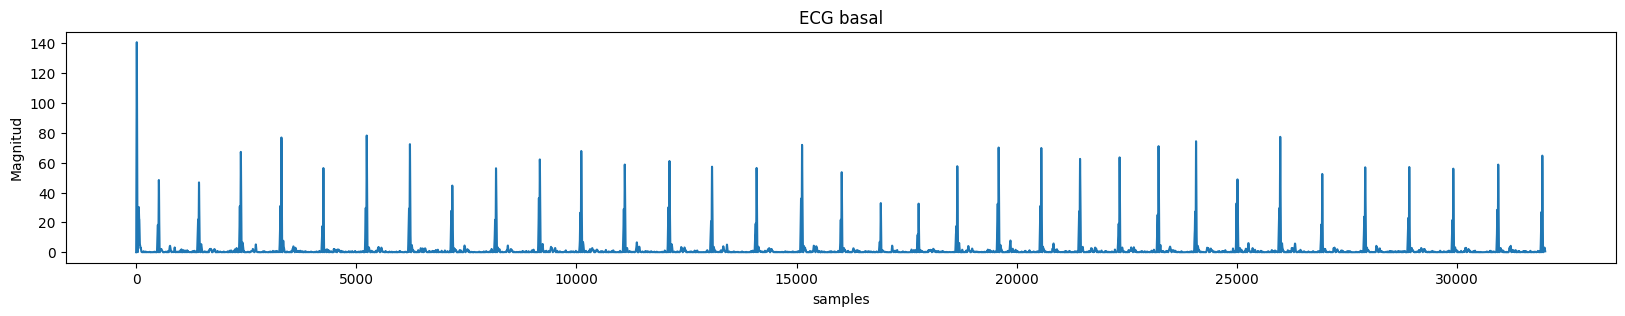

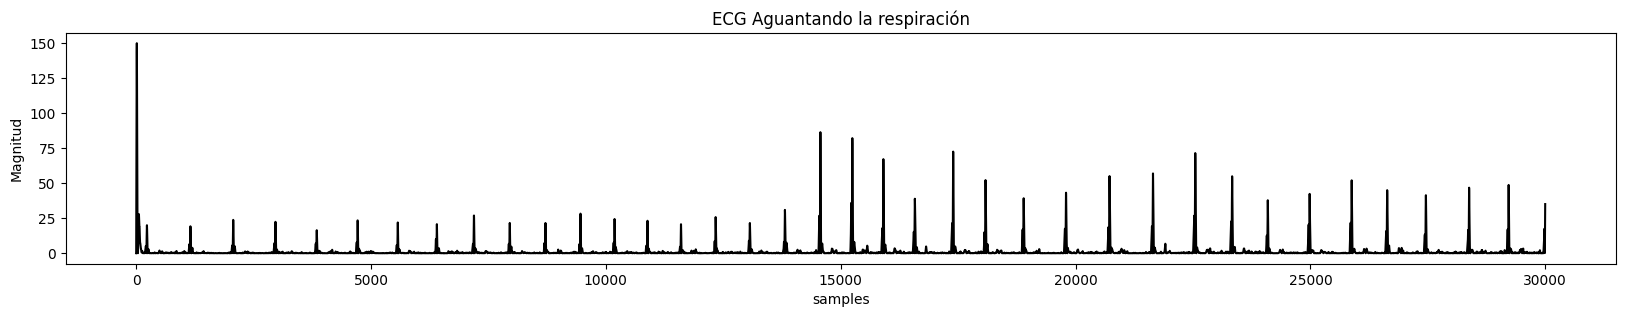

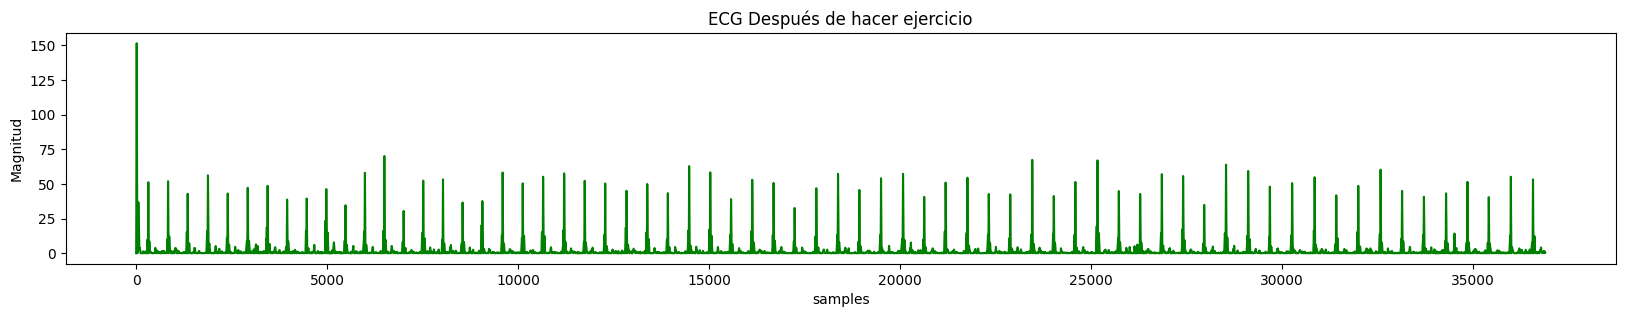

In [37]:
# Filtro cuadrado
f_sq = np.square(fd_signal)
plt.figure(figsize=(20,3))
plt.plot(f_sq)
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.show()

f_sq2 = np.square(fd_signal2)
plt.figure(figsize=(20,3))
plt.plot(f_sq2,'k')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Aguantando la respiración")
plt.show()

f_sq3 = np.square(fd_signal3)
plt.figure(figsize=(20,3))
plt.plot(f_sq3,'g')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Después de hacer ejercicio")
plt.show()

**OPERADOR MOVING WINDOW INTEGRATION**

Este operador tiene como función extraer ciertas características de la onda.

y[n]=(1/N)(x[n−(N−1)]+x[n−(N−2)]+..+x[n])

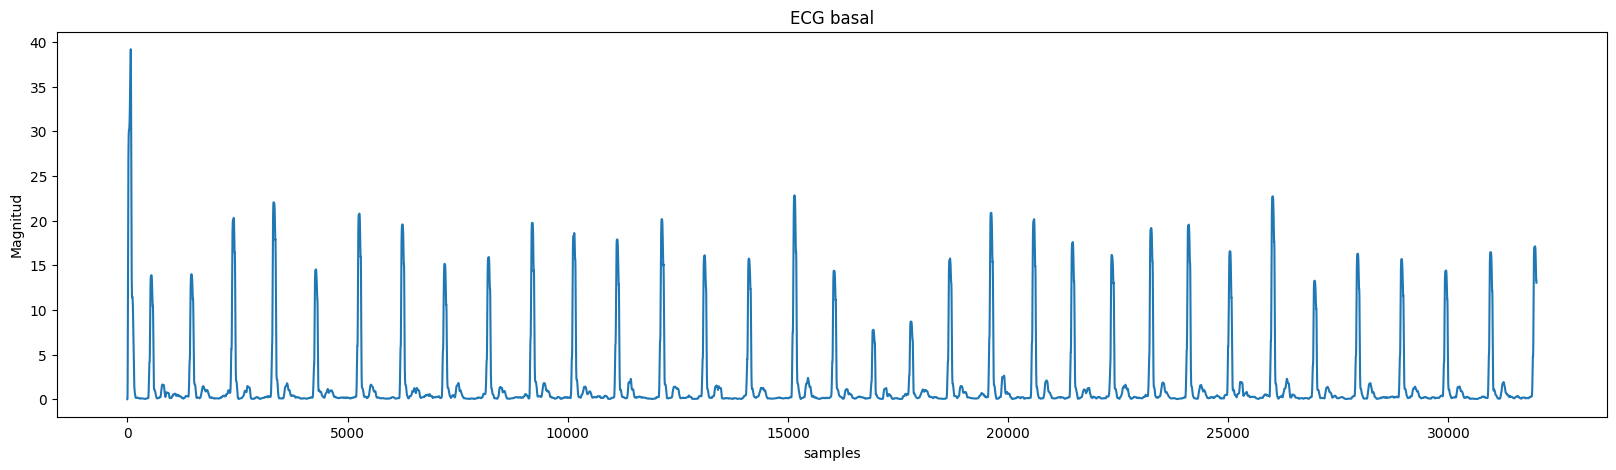

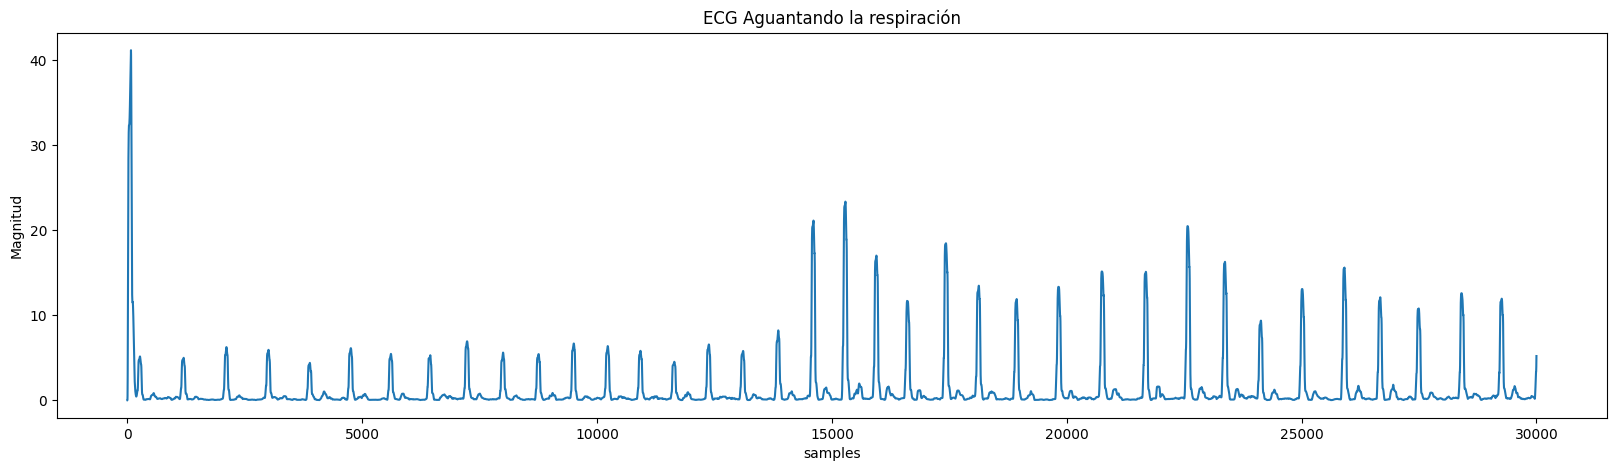

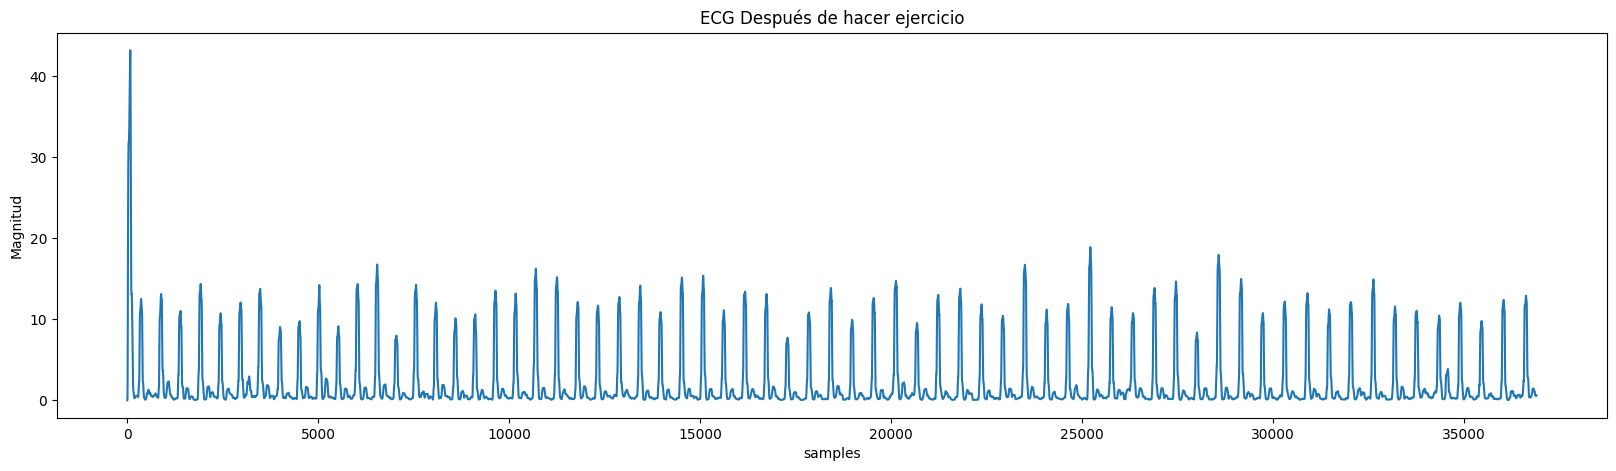

In [38]:
# Moving-Window Integration
N = 75
b = np.ones(N-1)
b = (1/N)*b
fi_signal = lfilter(b, 1, f_sq)
plt.figure(figsize=(20,5))
plt.plot(fi_signal)
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.show()

fi_signal2 = lfilter(b, 1, f_sq2)
plt.figure(figsize=(20,5))
plt.plot(fi_signal2)
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Aguantando la respiración")
plt.show()

fi_signal3 = lfilter(b, 1, f_sq3)
plt.figure(figsize=(20,5))
plt.plot(fi_signal3)
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Después de hacer ejercicio")
plt.show()

Colocando marcadores en los picos

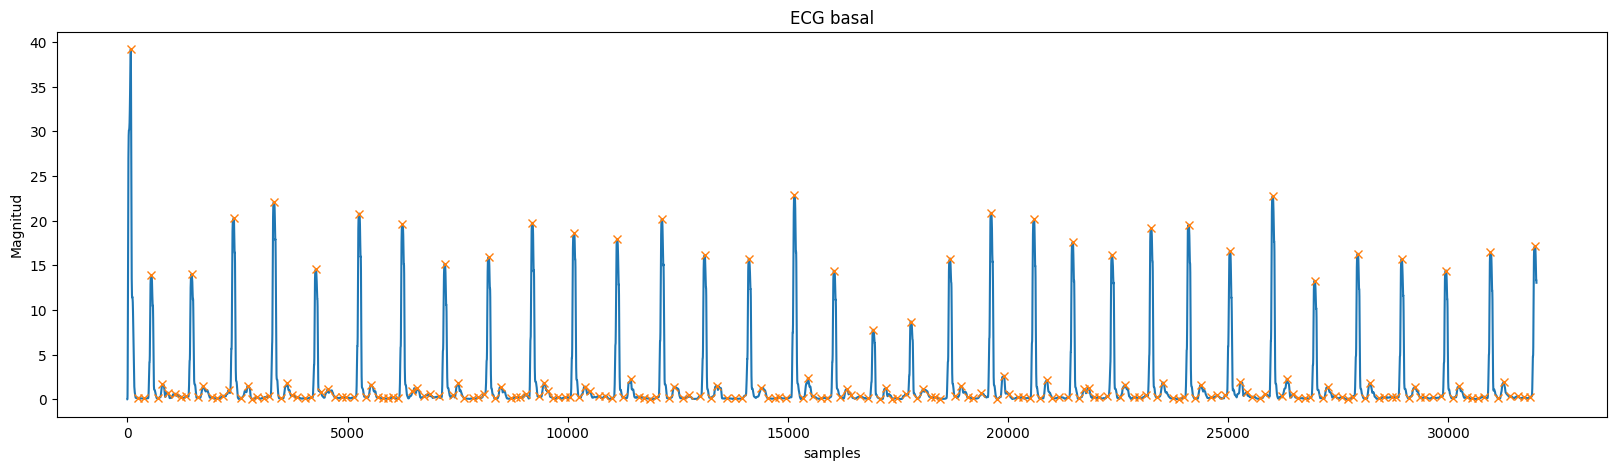

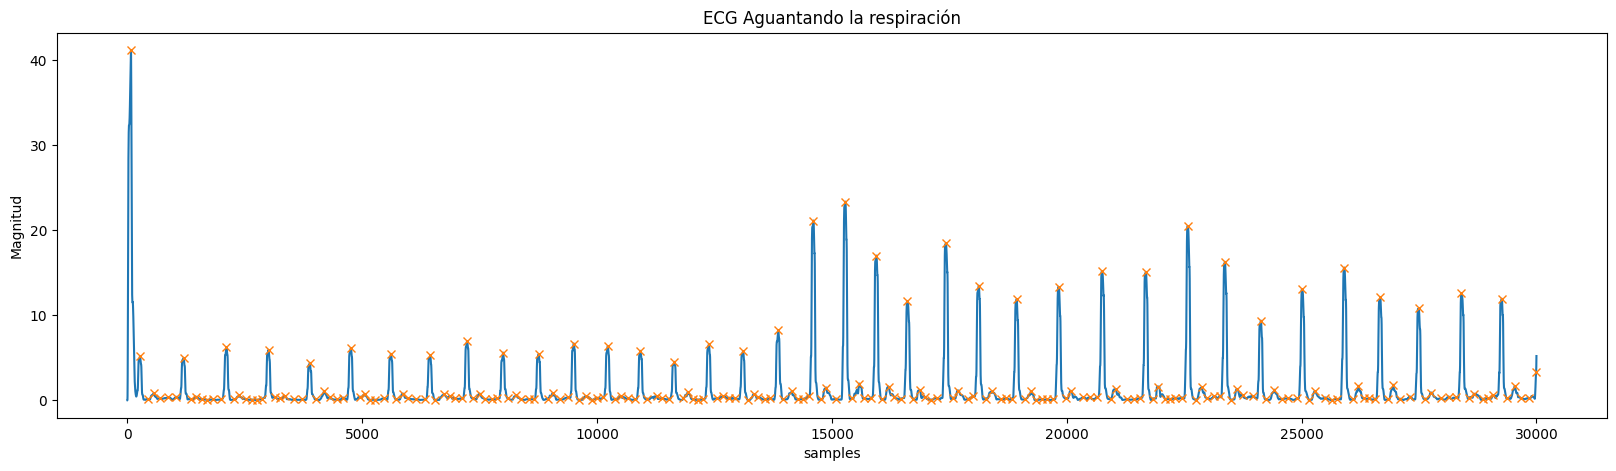

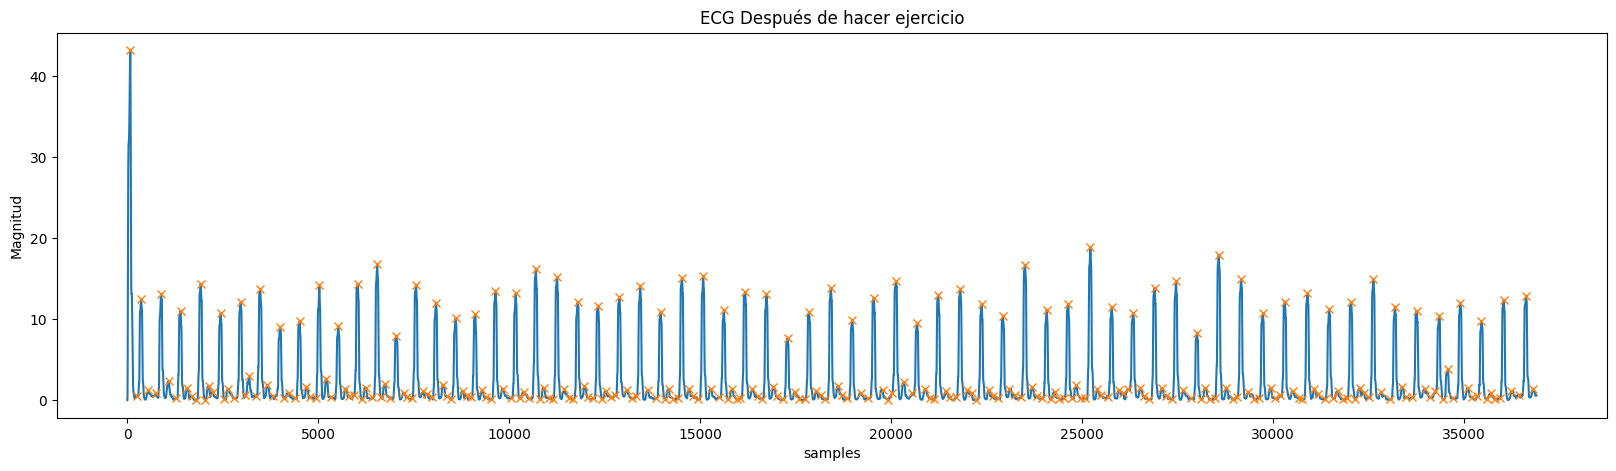

In [39]:
# Fiducial Marks

peaks, _ = find_peaks(fi_signal, distance=100)
plt.figure(figsize=(20,5))
plt.plot(fi_signal)
plt.plot(peaks, fi_signal[peaks], "x")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.show()

peaks2, _ = find_peaks(fi_signal2, distance=100)
plt.figure(figsize=(20,5))
plt.plot(fi_signal2)
plt.plot(peaks2, fi_signal2[peaks2], "x")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Aguantando la respiración")
plt.show()

peaks3, _ = find_peaks(fi_signal3, distance=100)
plt.figure(figsize=(20,5))
plt.plot(fi_signal3)
plt.plot(peaks3, fi_signal3[peaks3], "x")
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Después de hacer ejercicio")
plt.show()

**ANÁLISIS DE THRESHOLD**

El valor del umbral de pico R de entrada es  9.796890366891224
El valor del umbral de ruido de entrada es  1.6047510765344986


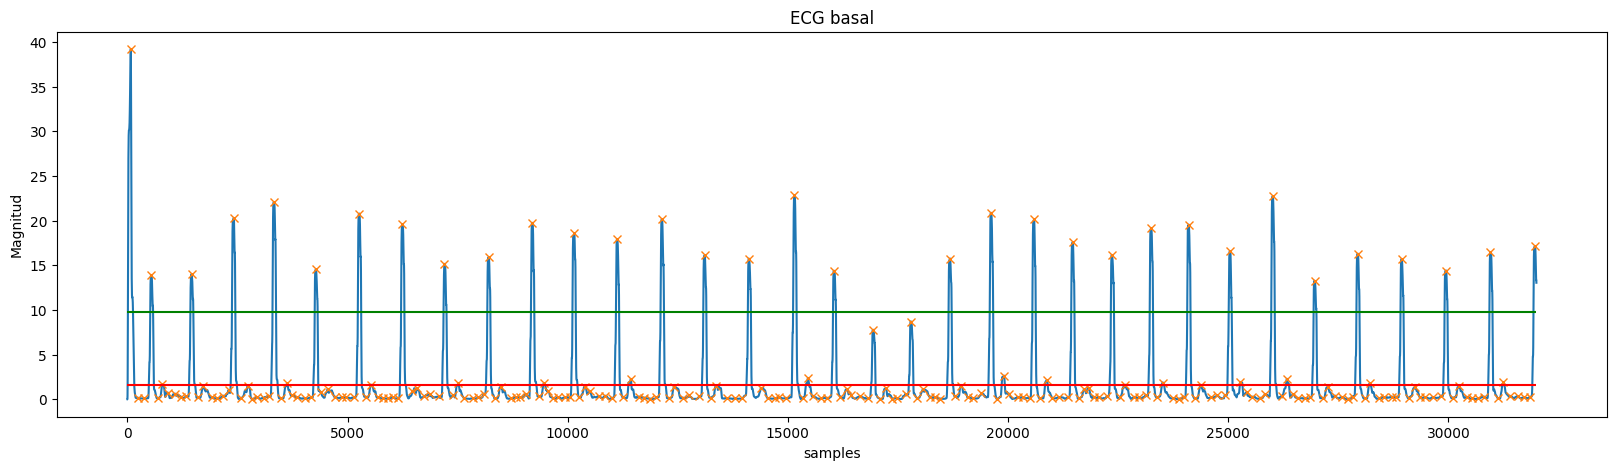

El valor del umbral de pico R de entrada es  10.289898278755375
El valor del umbral de ruido de entrada es  1.1577164427589068


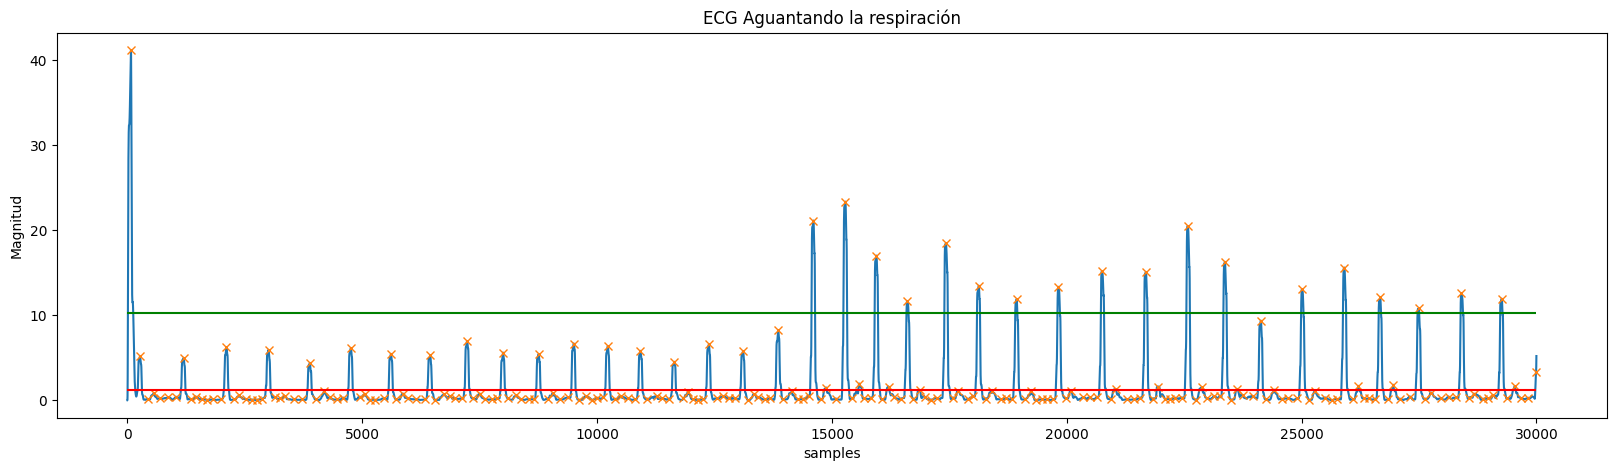

El valor del umbral de pico R de entrada es  10.800140286241815
El valor del umbral de ruido de entrada es  1.9314069740134183


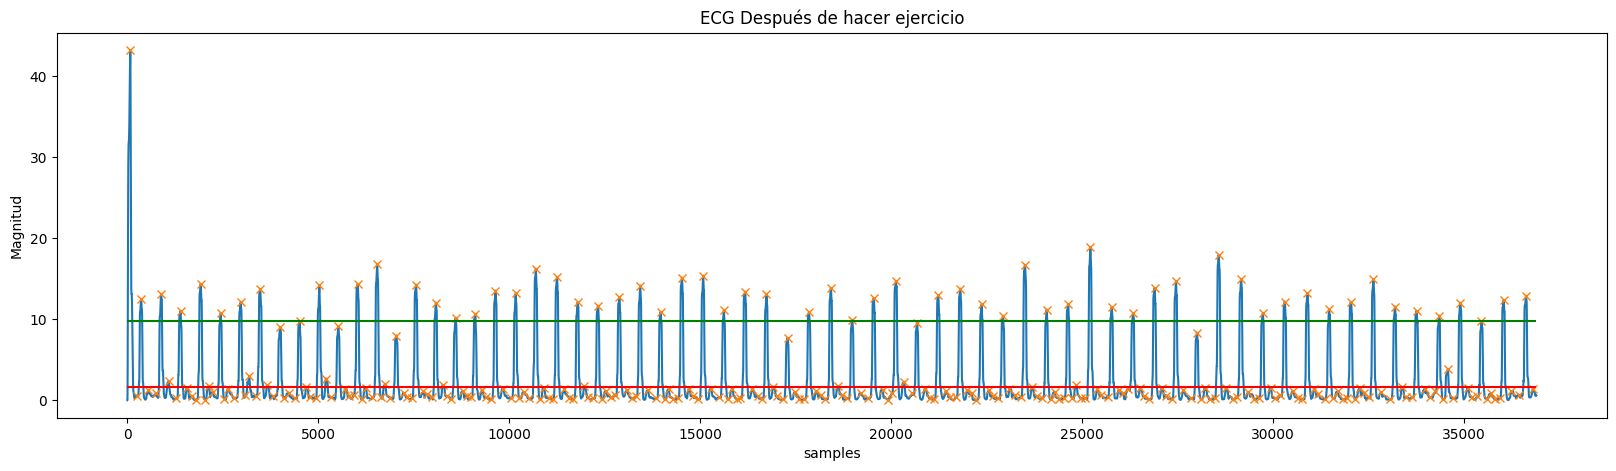

In [40]:
# Training Part to set Threshold I1 and Threshold I2
# Para las primeras muestras en 2 segundos
# Para efectos del ejercicio vamos a analizar toda la señal
f_samples = len(peaks)
th_I1 = np.max(fi_signal[peaks[:f_samples]])*0.25
th_I2 = 0.5*np.mean(fi_signal[peaks[:f_samples]])
print ("El valor del umbral de pico R de entrada es ", th_I1)
print ("El valor del umbral de ruido de entrada es ", th_I2)
plt.figure(figsize=(20,5))
plt.plot(fi_signal)
#plt.xlim(50,1000)
plt.plot(peaks, fi_signal[peaks], "x")
plt.hlines(th_I1, 0, len(fi_signal), colors='green')
plt.hlines(th_I2, 0, len(fi_signal), colors='red')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.show()

f_samples2 = len(peaks2)
th_I12 = np.max(fi_signal2[peaks2[:f_samples2]])*0.25
th_I22 = 0.5*np.mean(fi_signal2[peaks2[:f_samples2]])
print ("El valor del umbral de pico R de entrada es ", th_I12)
print ("El valor del umbral de ruido de entrada es ", th_I22)
plt.figure(figsize=(20,5))
plt.plot(fi_signal2)
#plt.xlim(50,1000)
plt.plot(peaks2, fi_signal2[peaks2], "x")
plt.hlines(th_I12, 0, len(fi_signal2), colors='green')
plt.hlines(th_I22, 0, len(fi_signal2), colors='red')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Aguantando la respiración")
plt.show()

f_samples3 = len(peaks3)
th_I13 = np.max(fi_signal3[peaks3[:f_samples3]])*0.25
th_I23 = 0.5*np.mean(fi_signal3[peaks3[:f_samples3]])
print ("El valor del umbral de pico R de entrada es ", th_I13)
print ("El valor del umbral de ruido de entrada es ", th_I23)
plt.figure(figsize=(20,5))
plt.plot(fi_signal3)
#plt.xlim(50,1000)
plt.plot(peaks3, fi_signal3[peaks3], "x")
plt.hlines(th_I1, 0, len(fi_signal3), colors='green')
plt.hlines(th_I2, 0, len(fi_signal3), colors='red')
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Después de hacer ejercicio")
plt.show()

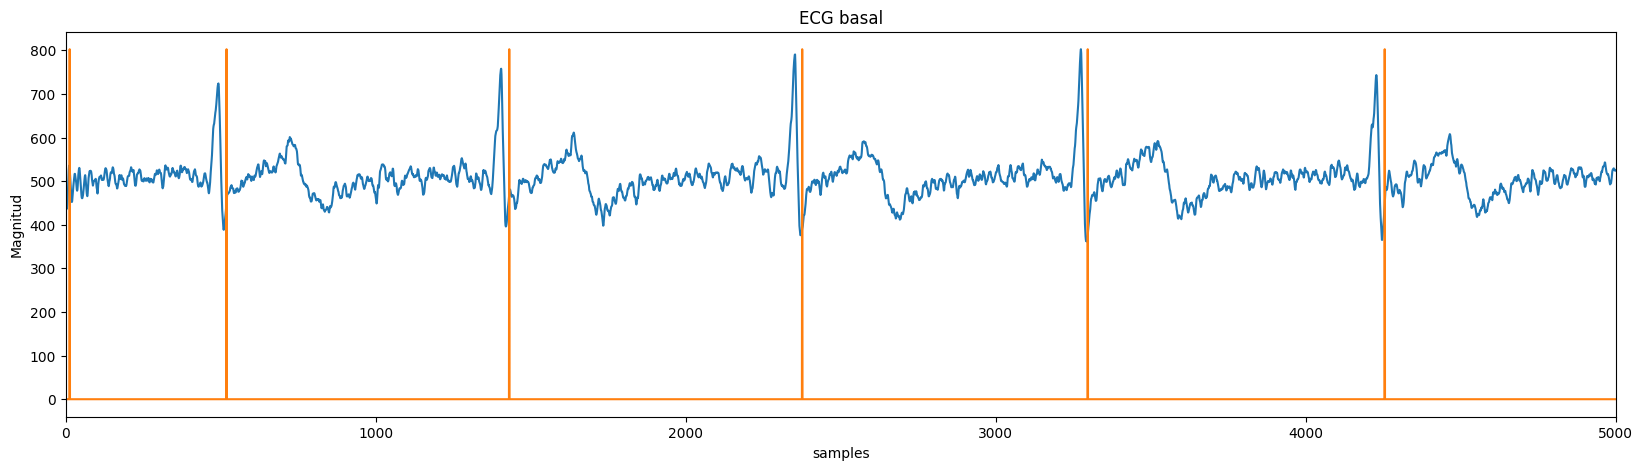

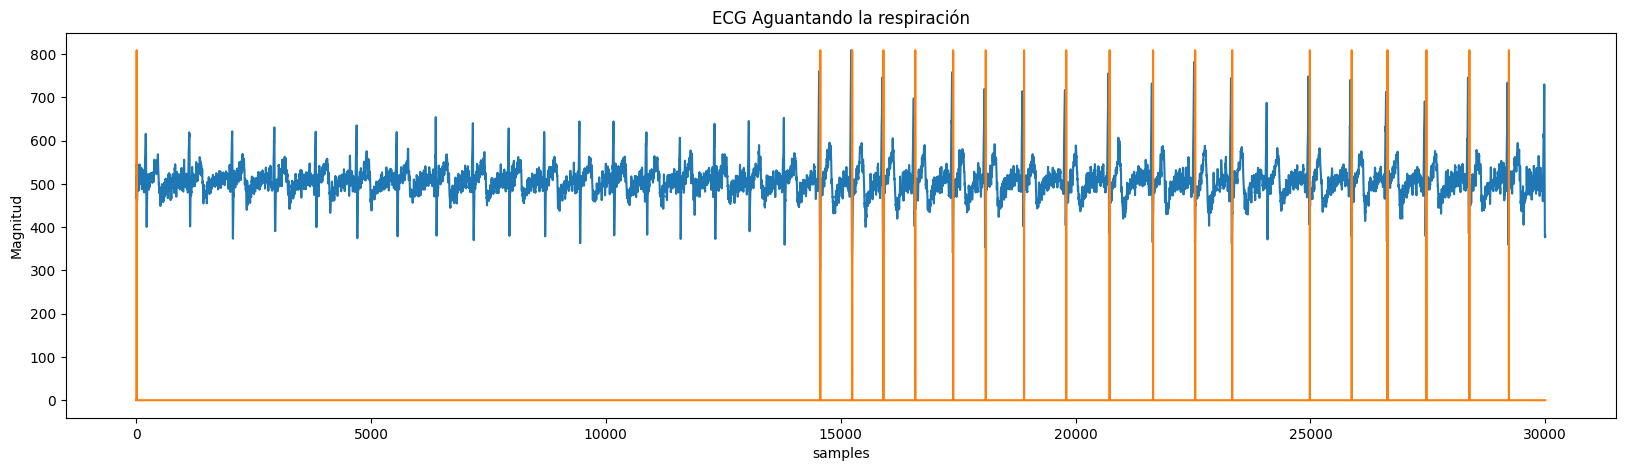

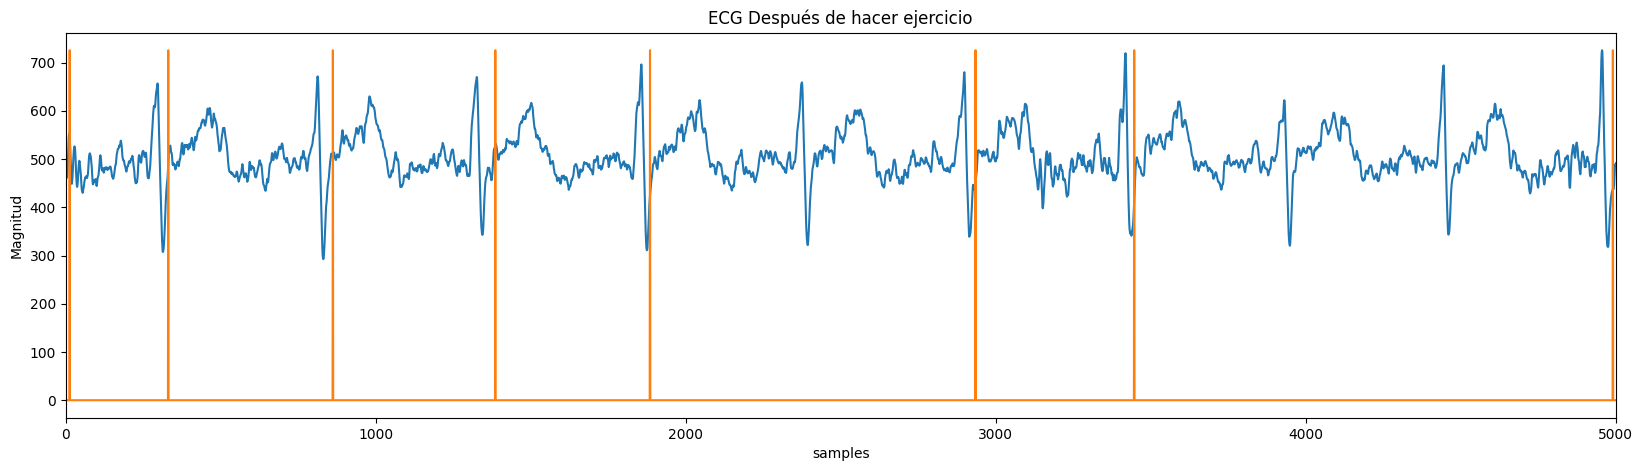

In [41]:
end_qrs = fi_signal > th_I1
roll_qrs_r = np.roll(end_qrs, 1)
roll_qrs_l = np.roll(end_qrs, -1)
end_qrs = np.logical_xor(end_qrs ,roll_qrs_r)
end_qrs = np.logical_and(end_qrs ,roll_qrs_l)
plt.figure(figsize=(20,5))
plt.xlim(0,5000)
plt.plot(ecg_signal)
plt.plot(end_qrs*np.max(ecg_signal))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.show()

end_qrs2 = fi_signal2 > th_I12
roll_qrs_r2 = np.roll(end_qrs2, 1)
roll_qrs_l2 = np.roll(end_qrs2, -1)
end_qrs2 = np.logical_xor(end_qrs2 ,roll_qrs_r2)
end_qrs2 = np.logical_and(end_qrs2 ,roll_qrs_l2)
plt.figure(figsize=(20,5))
# plt.xlim(0,10000)
plt.plot(ecg_signal2)
plt.plot(end_qrs2*np.max(ecg_signal2))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Aguantando la respiración")
plt.show()

end_qrs3 = fi_signal3 > th_I13
roll_qrs_r3 = np.roll(end_qrs3, 1)
roll_qrs_l3 = np.roll(end_qrs3, -1)
end_qrs3 = np.logical_xor(end_qrs3 ,roll_qrs_r3)
end_qrs3 = np.logical_and(end_qrs3 ,roll_qrs_l3)
plt.figure(figsize=(20,5))
plt.xlim(0,5000)
plt.plot(ecg_signal3)
plt.plot(end_qrs3*np.max(ecg_signal3))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Después de hacer ejercicio")
plt.show()

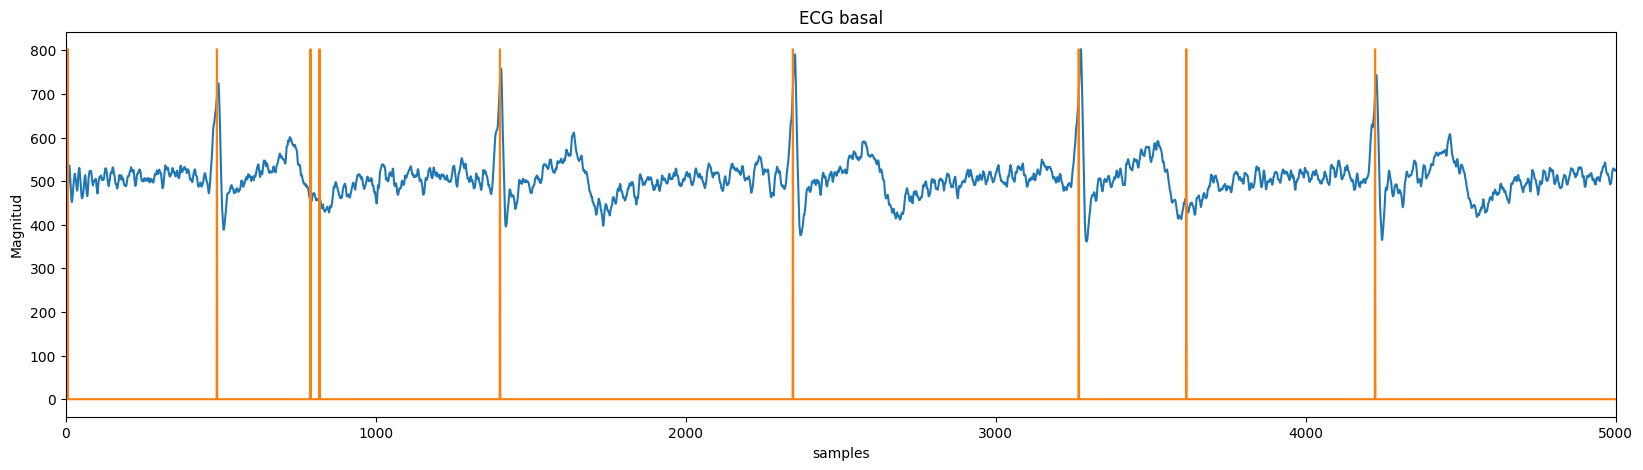

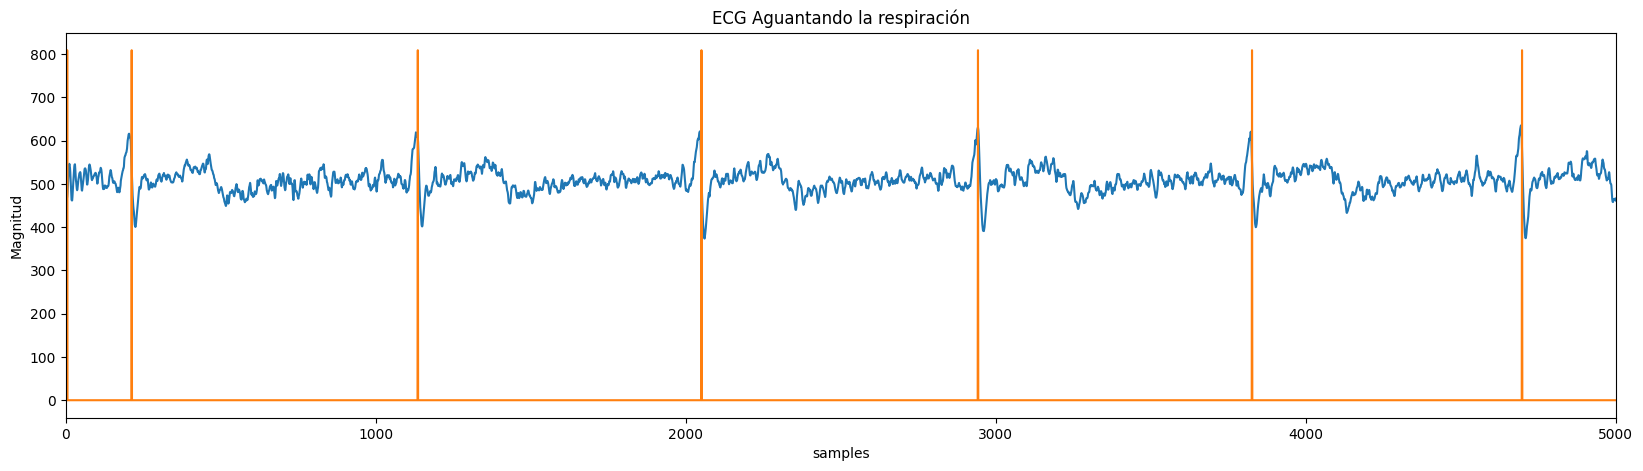

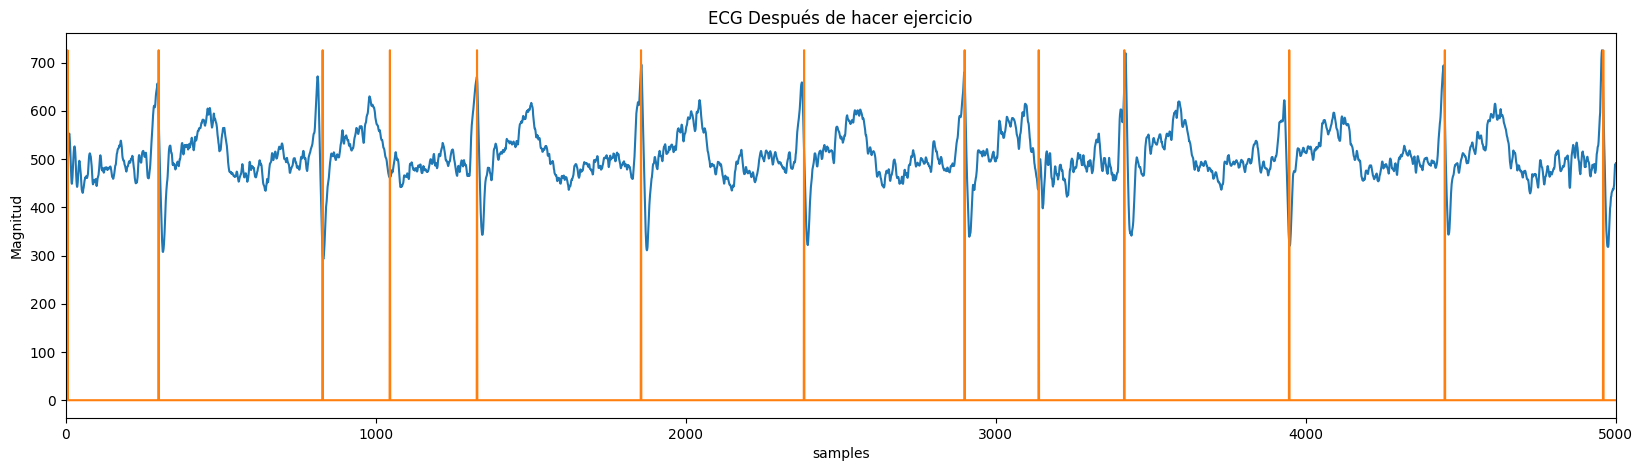

In [42]:
start_qrs = fi_signal < th_I2
roll_qrs_l = np.roll(start_qrs, -1)
roll_qrs_r = np.roll(start_qrs, 1)
start_qrs = np.logical_xor(start_qrs ,roll_qrs_l)
start_qrs = np.logical_and(start_qrs ,roll_qrs_r)
plt.figure(figsize=(20,5))
plt.plot(ecg_signal)
plt.xlim(0,5000)
plt.plot(start_qrs*np.max(ecg_signal))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.show()

start_qrs2 = fi_signal2 < th_I22
roll_qrs_l2 = np.roll(start_qrs2, -1)
roll_qrs_r2 = np.roll(start_qrs2, 1)
start_qrs2 = np.logical_xor(start_qrs2 ,roll_qrs_l2)
start_qrs2 = np.logical_and(start_qrs2 ,roll_qrs_r2)
plt.figure(figsize=(20,5))
plt.plot(ecg_signal2)
plt.xlim(0,5000)
plt.plot(start_qrs2*np.max(ecg_signal2))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Aguantando la respiración")
plt.show()

start_qrs3 = fi_signal3 < th_I23
roll_qrs_l3 = np.roll(start_qrs3, -1)
roll_qrs_r3 = np.roll(start_qrs3, 1)
start_qrs3 = np.logical_xor(start_qrs3 ,roll_qrs_l3)
start_qrs3 = np.logical_and(start_qrs3 ,roll_qrs_r3)
plt.figure(figsize=(20,5))
plt.plot(ecg_signal3)
plt.xlim(0,5000)
plt.plot(start_qrs3*np.max(ecg_signal3))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Después de hacer ejercicio")
plt.show()

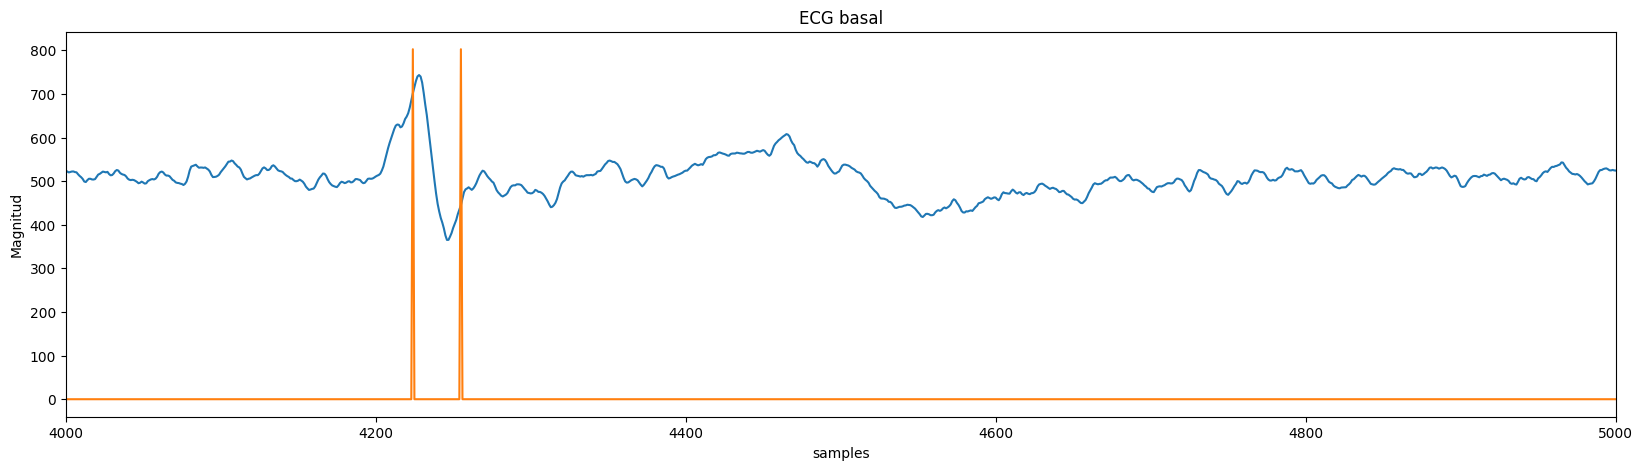

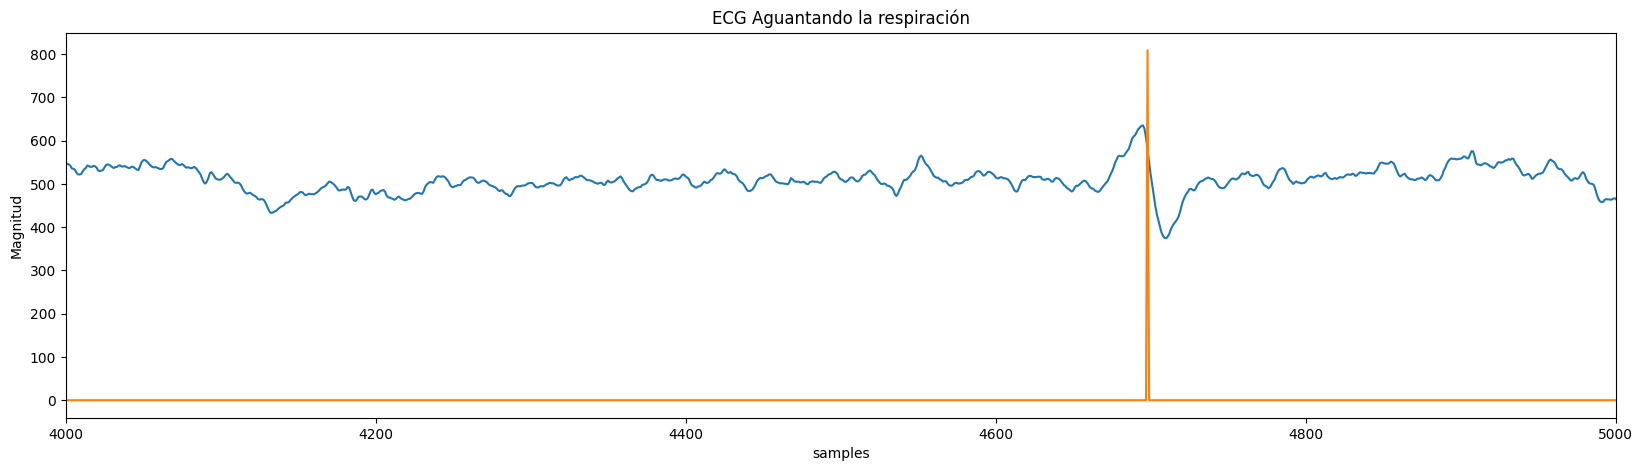

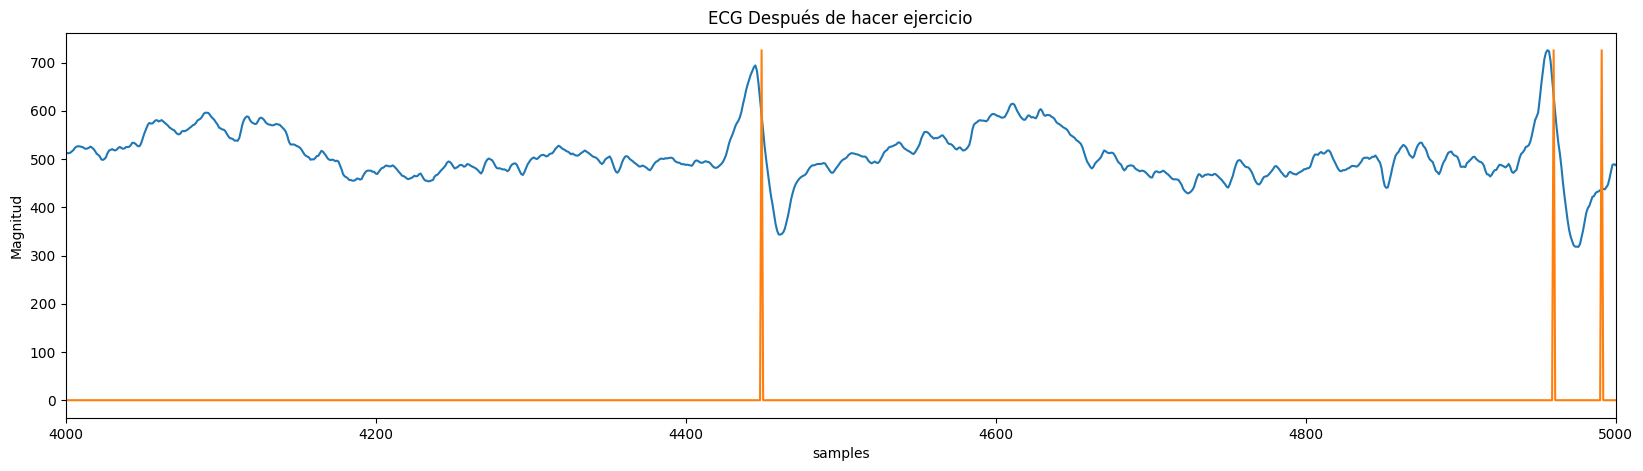

In [43]:
qrs = np.logical_or(start_qrs, end_qrs)
plt.figure(figsize=(20,5))
plt.xlim(4000,5000)
plt.plot(ecg_signal)
plt.plot(qrs*np.max(ecg_signal))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.show()

qrs2 = np.logical_or(start_qrs2, end_qrs2)
plt.figure(figsize=(20,5))
plt.xlim(4000,5000)
plt.plot(ecg_signal2)
plt.plot(qrs2*np.max(ecg_signal2))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Aguantando la respiración")
plt.show()

qrs3 = np.logical_or(start_qrs3, end_qrs3)
plt.figure(figsize=(20,5))
plt.xlim(4000,5000)
plt.plot(ecg_signal3)
plt.plot(qrs3*np.max(ecg_signal3))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Después de hacer ejercicio")
plt.show()


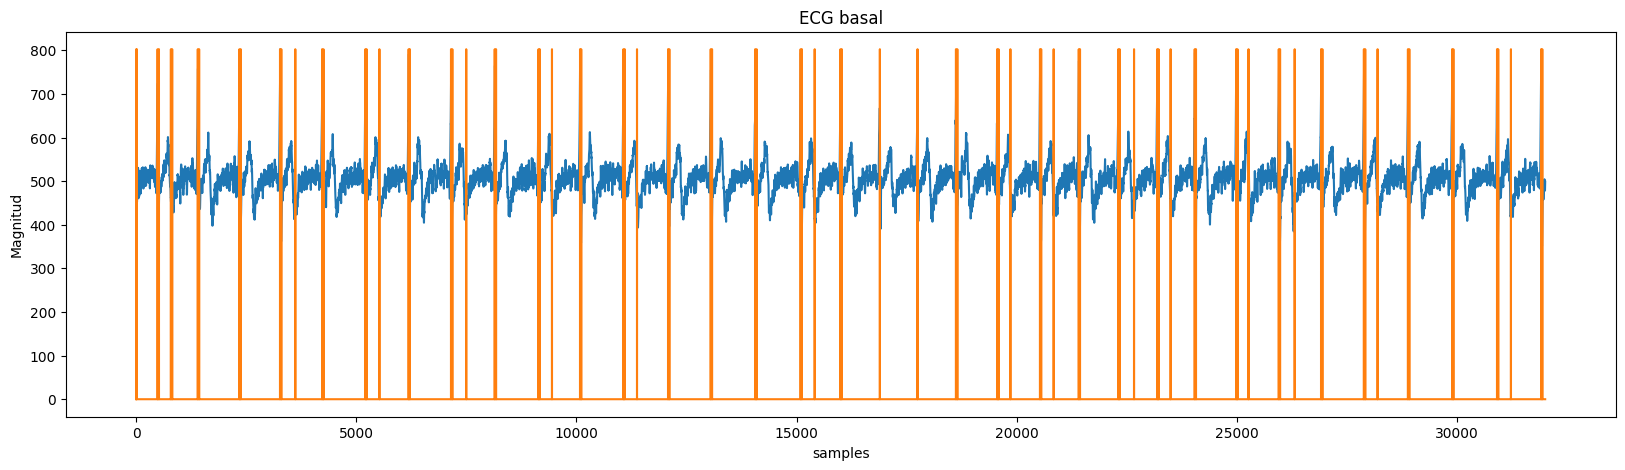

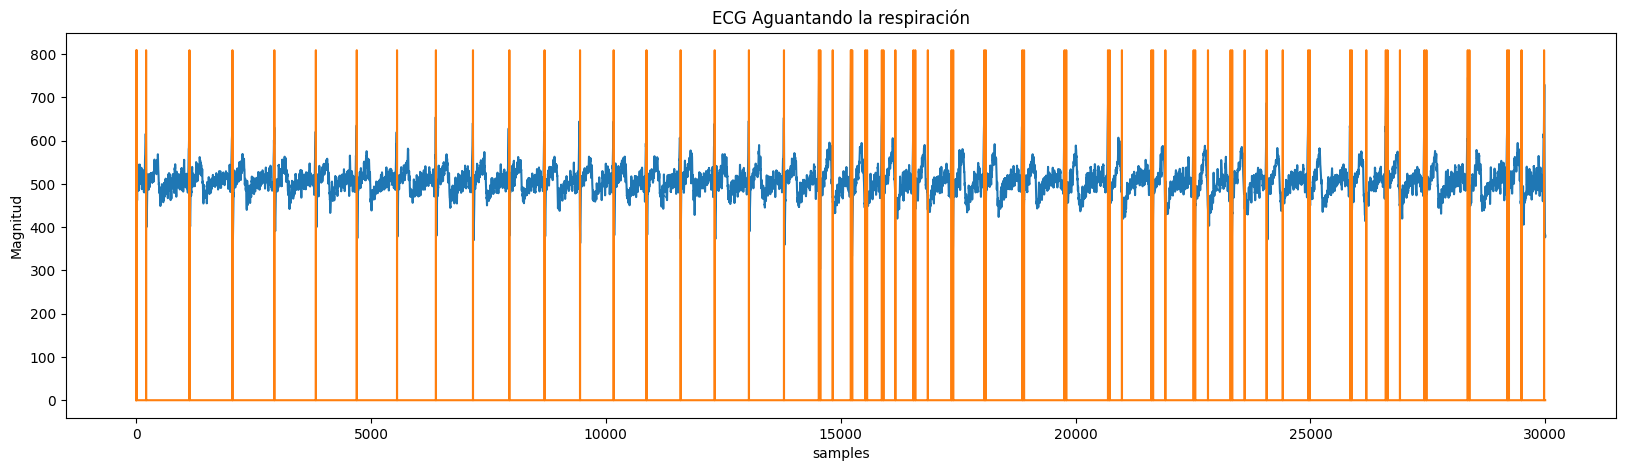

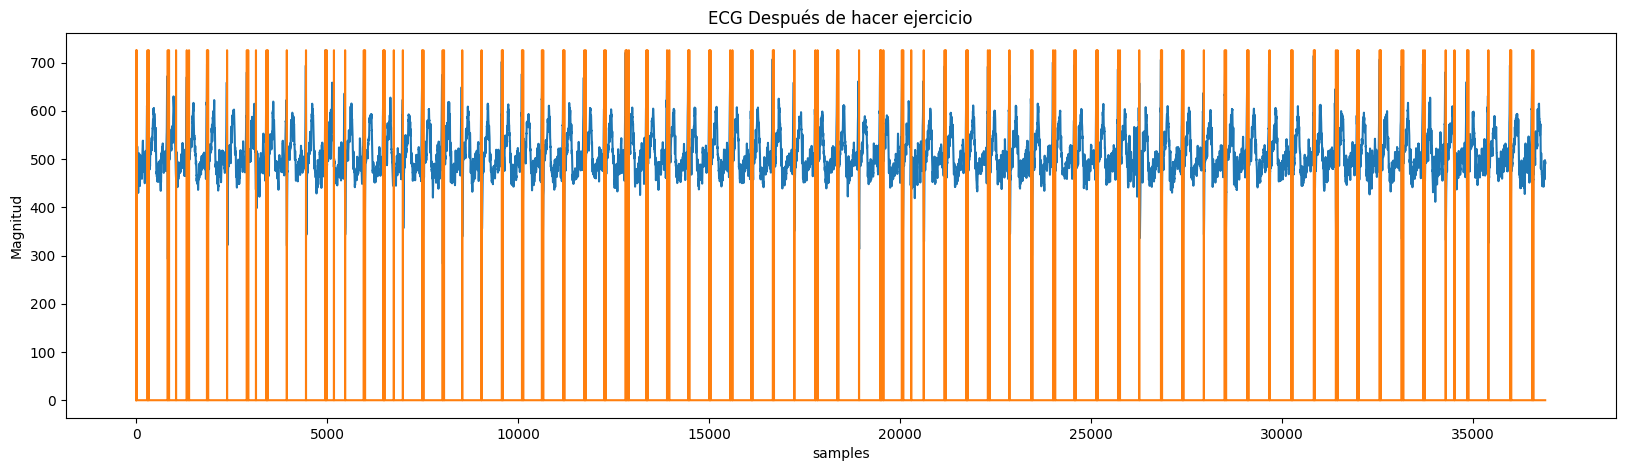

In [44]:
qrs = np.logical_or(start_qrs, end_qrs)
plt.figure(figsize=(20,5))
plt.plot(ecg_signal)
plt.plot(qrs*np.max(ecg_signal))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG basal")
plt.show()

qrs2 = np.logical_or(start_qrs2, end_qrs2)
plt.figure(figsize=(20,5))
plt.plot(ecg_signal2)
plt.plot(qrs2*np.max(ecg_signal2))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Aguantando la respiración")
plt.show()

qrs3 = np.logical_or(start_qrs3, end_qrs3)
plt.figure(figsize=(20,5))
plt.plot(ecg_signal3)
plt.plot(qrs3*np.max(ecg_signal3))
plt.xlabel("samples")
plt.ylabel("Magnitud")
plt.title("ECG Después de hacer ejercicio")
plt.show()